In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df=pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

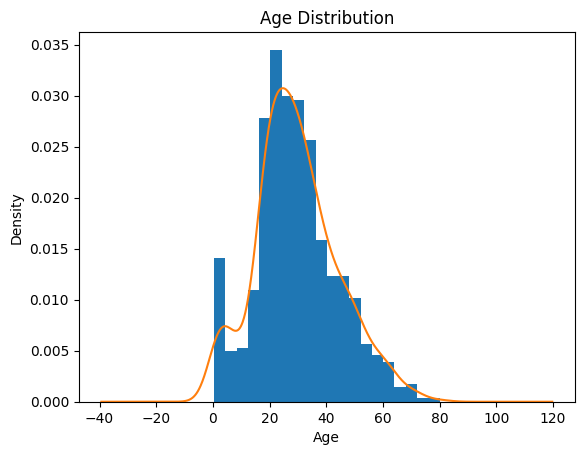

In [11]:
import matplotlib.pyplot as plt

df['Age'].plot(kind='hist', bins=20, density=True)
df['Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()


In [13]:
mean = df['Age'].mean()
median = df['Age'].median()
skew = df['Age'].skew()

print(mean, median, skew)


29.69911764705882 28.0 0.38910778230082704


In [3]:
df['Age'] = df['Age'].fillna(round(df['Age'].mean()))


In [19]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
df = df.dropna(subset=['Embarked'])


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.713352,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.969135,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
df.Cabin.value_counts()

Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 146, dtype: int64

In [6]:
df=df.drop(columns=['Cabin'])

In [7]:
df=df.drop(columns=['Name'])

In [8]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [38]:
df.Ticket.value_counts()

Ticket
567    7
79     7
332    7
248    6
565    6
      ..
523    1
364    1
123    1
298    1
526    1
Name: count, Length: 680, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Ticket'] = le.fit_transform(df['Ticket'])


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 76.4 KB


In [42]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1,'Q':2})


In [48]:
df.corr()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked
Survived,1.000000,-0.335549,0.541585,-0.075512,-0.160931,0.255290,0.108669
Pclass,-0.335549,1.000000,-0.127741,-0.326343,0.315959,-0.548193,0.043835
Sex,0.541585,-0.127741,1.000000,-0.089927,-0.055024,0.179958,0.118593
Age,-0.075512,-0.326343,-0.089927,1.000000,-0.063521,0.087674,0.012451
Ticket,-0.160931,0.315959,-0.055024,-0.063521,1.000000,-0.010562,0.041948
Fare,0.255290,-0.548193,0.179958,0.087674,-0.010562,1.000000,0.063462
Embarked,0.108669,0.043835,0.118593,0.012451,0.041948,0.063462,1.000000


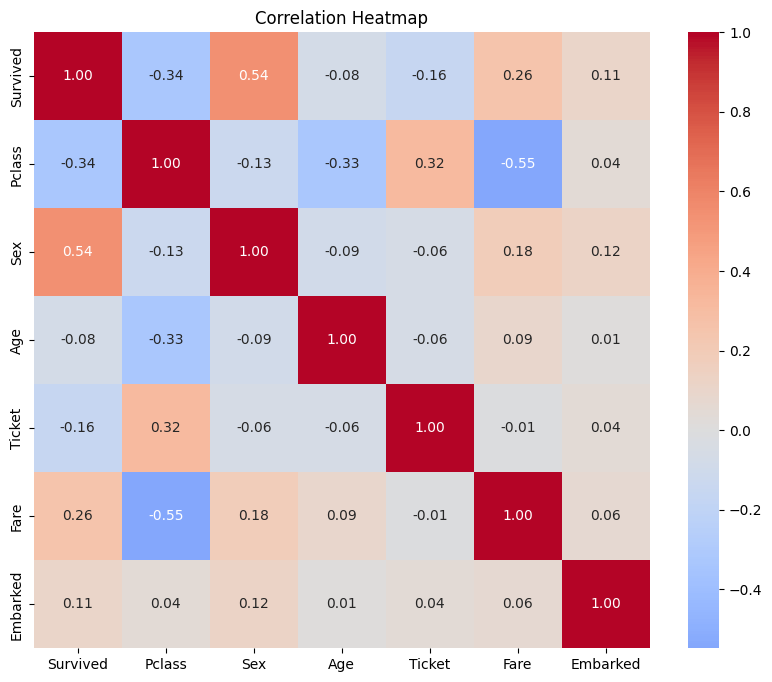

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True
)
plt.title("Correlation Heatmap")
plt.show()


In [29]:
df=df.drop(columns=['Embarked','PassengerId'])

In [38]:

df=df.drop(columns=['Parch'])

In [39]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [42]:
dt = DecisionTreeClassifier(
    criterion='gini',        # or 'entropy'
    max_depth=5,             # controls overfitting
    min_samples_split=10,
    random_state=42
)


In [43]:
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [44]:
y_pred = dt.predict(X_test)


In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8033707865168539
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.71      0.74        69

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



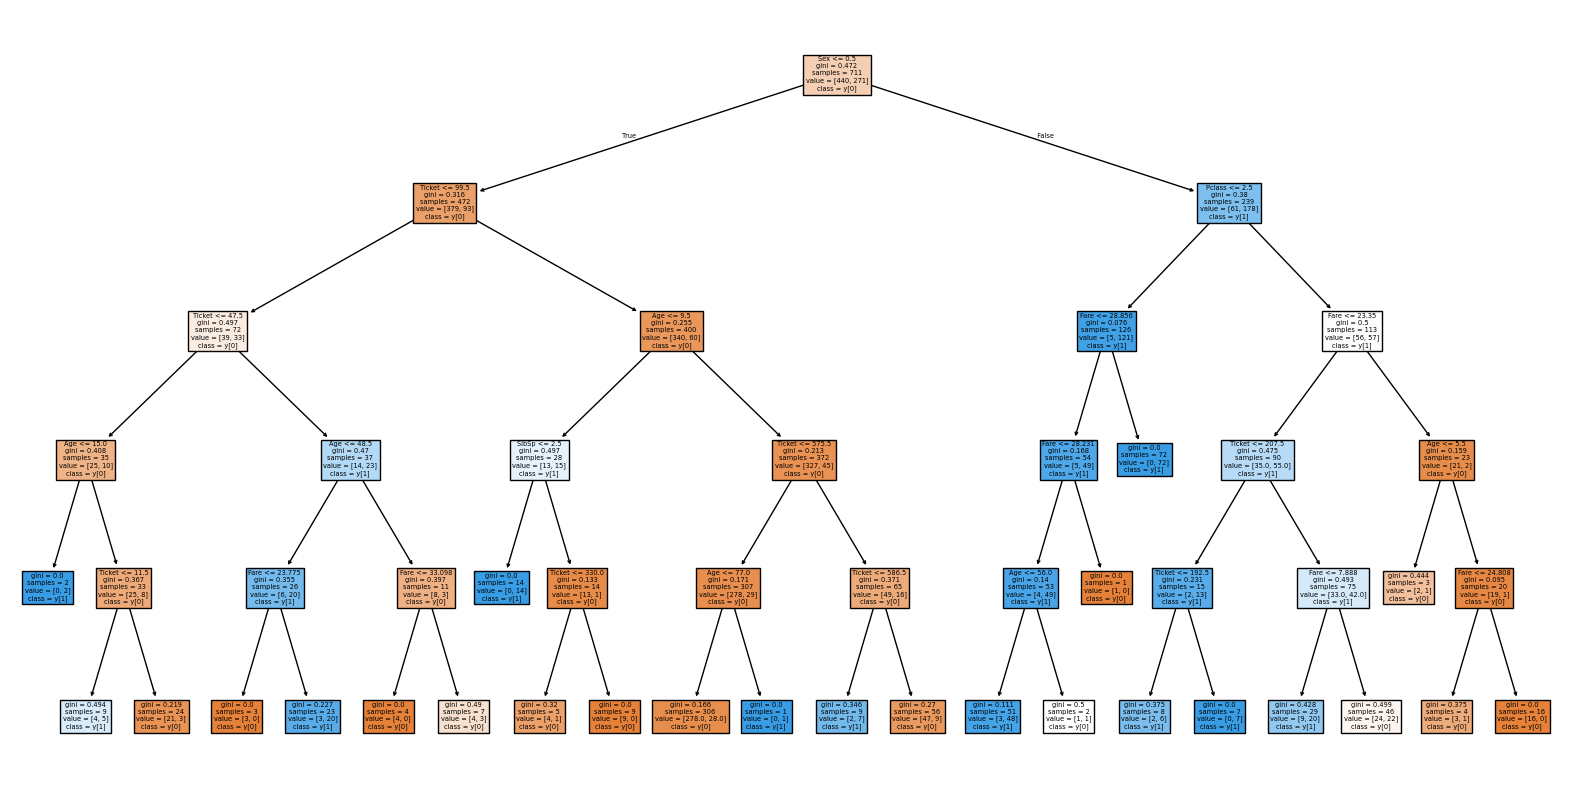

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=x.columns,
    class_names=True,
    filled=True
)
plt.show()


Sex       0.479532
Ticket    0.148772
Pclass    0.124733
Fare      0.096765
Age       0.089394
SibSp     0.060804
dtype: float64


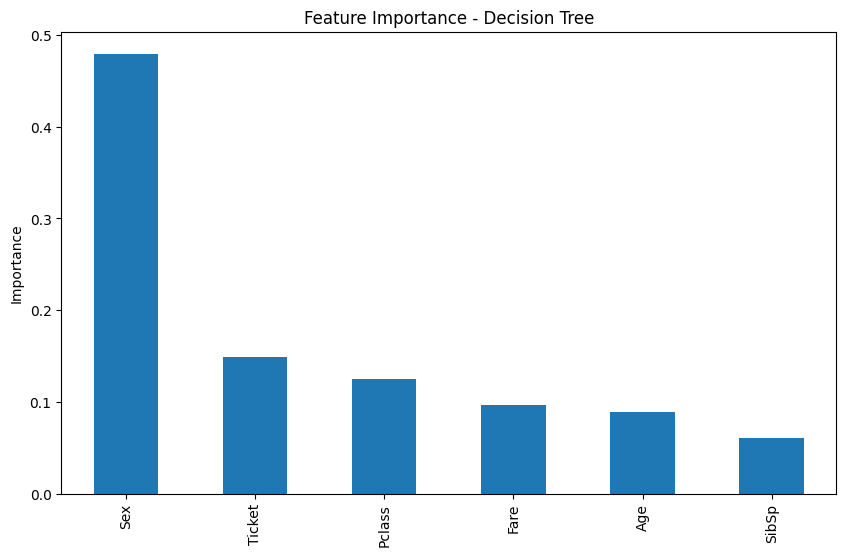

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = pd.Series(dt.feature_importances_, index=x.columns)

# Sort descending
feature_importance = feature_importance.sort_values(ascending=False)

# Print
print(feature_importance)

# Plot
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Decision Tree")
plt.ylabel("Importance")
plt.show()


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=42)
rf.fit(x, y)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb.fit(x, y)


GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

In [51]:
# XGBoost example
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
xgb_model.fit(x, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(x, y)


LogisticRegression(max_iter=500)

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)


KNeighborsClassifier()

In [54]:
from sklearn.model_selection import cross_val_score

models = [rf, gb, xgb_model, lr, knn,dt]
for model in models:
    scores = cross_val_score(model, x, y, cv=5)
    print(model.__class__.__name__, "CV Accuracy:", scores.mean())


RandomForestClassifier CV Accuracy: 0.8178124801625086
GradientBoostingClassifier CV Accuracy: 0.833568209229988
XGBClassifier CV Accuracy: 0.8357900082523964
LogisticRegression CV Accuracy: 0.7953024820669079
KNeighborsClassifier CV Accuracy: 0.6839332190693836
DecisionTreeClassifier CV Accuracy: 0.808817368120358


In [56]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1],
    'colsample_bytree': [0.7, 0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2, 0.3],  # min loss reduction for split
    'reg_alpha': [0, 0.01, 0.1],  # L1 regularization
    'reg_lambda': [1, 1.5, 2]     # L2 regularization
}
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,             # number of combinations to try
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x, y)
print("Best parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:23] WARNING: /w

Best parameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.01, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Best CV Accuracy: 0.8425569732749316


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:21:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [57]:
best_xgb = XGBClassifier(
    **random_search.best_params_,
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
best_xgb.fit(x, y)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:22:02] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

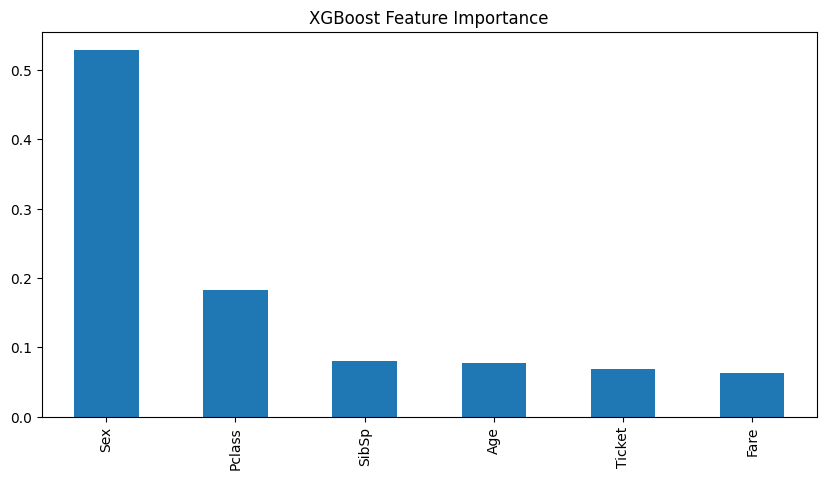

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

fi = pd.Series(best_xgb.feature_importances_, index=x.columns).sort_values(ascending=False)
fi.plot(kind='bar', figsize=(10,5))
plt.title("XGBoost Feature Importance")
plt.show()
